In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

#for metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

from joblib import dump

In [2]:
df_data = pd.read_csv("../../results/selected_dataset_for_model/Binary_model/prottrans_albert.csv")

#df_hfb_1 = df_data[df_data["target"] == "HFB Class I"]
#df_hfb_2 = df_data[df_data["target"] == "HFB Class II"]

#df_data = pd.concat([df_hfb_1, df_hfb_2], axis=0)
df_data

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_4087,p_4088,p_4089,p_4090,p_4091,p_4092,p_4093,p_4094,p_4095,target
0,0.090355,0.058882,-0.053704,-0.129286,-0.021354,-0.163299,-0.042826,0.000375,-0.049867,0.028974,...,0.079178,0.085426,-0.010836,0.065389,-0.065119,0.035333,-0.104281,-0.019405,-0.136099,Positive
1,0.096961,0.073131,-0.045041,-0.118824,-0.058067,-0.134528,-0.061350,0.015758,-0.052911,-0.007911,...,0.064988,0.075016,-0.021575,0.010116,-0.062273,0.045590,-0.132058,0.022760,-0.064762,Positive
2,0.180338,0.056693,-0.018316,-0.106876,-0.024675,-0.043643,-0.155664,0.070914,-0.032106,0.069142,...,-0.002008,-0.004614,-0.011181,0.026371,-0.128740,-0.013858,-0.178280,-0.133430,0.120036,Positive
3,0.071177,0.070383,-0.039720,-0.110513,-0.024093,-0.127679,-0.059036,-0.028378,-0.072602,0.026957,...,0.051725,0.095334,-0.020858,0.027050,-0.070191,0.044866,-0.073537,0.013518,-0.024173,Positive
4,0.078802,0.045469,-0.043989,-0.091229,-0.041784,-0.054253,-0.039199,0.059023,-0.015476,0.032508,...,0.024296,0.110813,0.022858,0.071638,-0.067575,-0.049409,-0.129777,0.031552,-0.056793,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42226,-0.038303,0.028185,-0.011818,-0.004119,0.006188,-0.036286,0.007546,-0.087704,-0.042099,-0.033733,...,0.017868,0.011744,0.051182,0.003511,-0.048249,-0.053633,-0.096245,-0.005175,-0.019926,Negative
42227,-0.077319,0.003655,-0.006315,0.021267,-0.014241,-0.023677,-0.008096,0.102153,0.023799,0.026544,...,-0.034680,0.058027,0.055786,-0.060700,0.075292,-0.094567,-0.098280,0.039608,-0.019240,Negative
42228,-0.053523,-0.070572,-0.030597,-0.001686,0.028952,-0.000928,-0.083378,0.008535,0.030562,-0.020148,...,0.058286,-0.013316,0.055047,0.066215,-0.070593,-0.056057,-0.004639,0.014168,0.012868,Negative
42229,-0.003870,-0.063098,-0.040298,-0.056421,0.026080,0.013839,-0.078156,0.077563,0.044134,0.067706,...,0.067190,0.010604,0.043625,0.023583,-0.000477,-0.055282,-0.028251,-0.014574,-0.007170,Negative


In [3]:
response = df_data['target']
df_to_train = df_data.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(df_to_train, response, random_state=42, test_size=0.3)

extra_trees_model = ExtraTreesClassifier(
    n_estimators=4467,
    criterion='gini',
    min_samples_split=47,
    min_samples_leaf=1,
    max_features='sqrt',
    n_jobs=-1
)

extra_trees_model.fit(X=X_train, y=y_train)


ExtraTreesClassifier(min_samples_split=47, n_estimators=4467, n_jobs=-1)

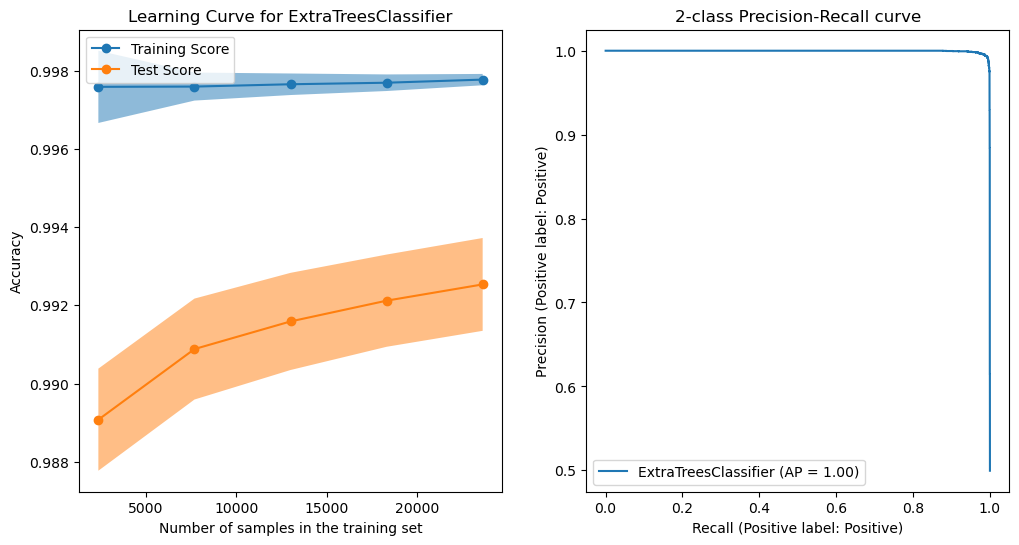

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(extra_trees_model, **common_params, ax=ax[0])
handles, label = ax[0].get_legend_handles_labels()
ax[0].legend(handles[:2], ["Training Score", "Test Score"])
ax[0].set_title(f"Learning Curve for {extra_trees_model.__class__.__name__}")

display = PrecisionRecallDisplay.from_estimator(
    extra_trees_model, X_test, y_test, name=extra_trees_model.__class__.__name__, ax=ax[1])
_ = display.ax_.set_title("2-class Precision-Recall curve")


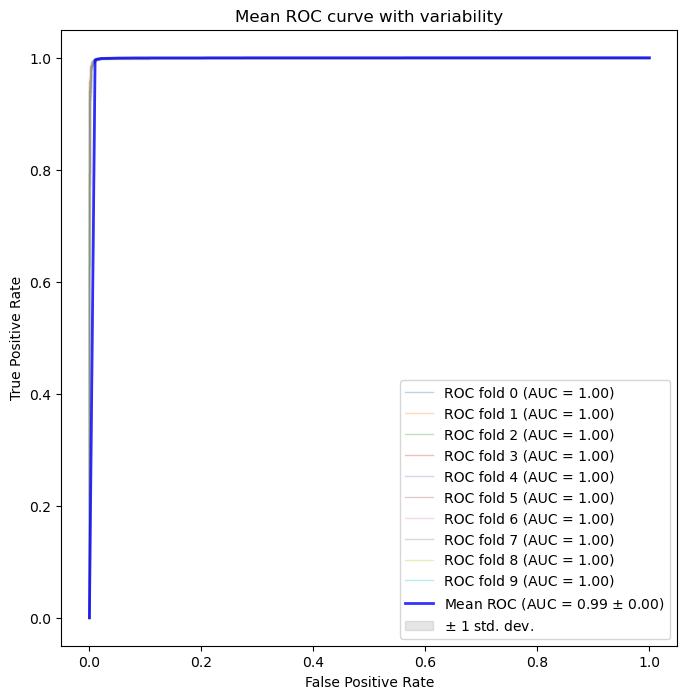

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for fold, (train, test) in enumerate(cv.split(X_train, y_train)):
    extra_trees_model.fit(X_train.values[train], y_train.values[train])
    viz = RocCurveDisplay.from_estimator(
        extra_trees_model,
        X_train.values[test],
        y_train.values[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability",
)
ax.axis("square")
ax.legend(loc="lower right")

In [6]:
dump(extra_trees_model, "../../results/selected_dataset_for_model/Binary_model/extra_trees_trained_model.joblib")

['../../results/selected_dataset_for_model/Binary_model/extra_trees_trained_model.joblib']